In [35]:
%pip install scikit-learn
%pip install seaborn

import seaborn as sns


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [37]:
data_path = "../data/engineered_dataset.csv"  
df = pd.read_csv(data_path)


print("Initial Columns:", df.columns)


Initial Columns: Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Subscription Tenure', 'CLV', 'Recency',
       'Frequency', 'Engagement Level'],
      dtype='object')


In [38]:
df['Engagement Level'] = df['Engagement Level'].fillna('Unknown')


In [39]:
features = ['CLV', 'Recency', 'Frequency', 'Engagement Level']
if not all([feature in df.columns for feature in features]):
    raise ValueError("Some required features are missing from the dataset. Make sure to complete feature engineering.")
label_encoder = LabelEncoder()
df['Engagement Level'] = label_encoder.fit_transform(df['Engagement Level'])
# Assuming 'Recency' is in days, and churn is defined as no purchases in the last 180 days
churn_threshold = 180
df['Churn'] = (df['Recency'] > churn_threshold).astype(int)


In [40]:
X = df[features]
y = df['Churn']  

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [44]:
clf.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


In [45]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00     10450

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000



In [47]:


X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


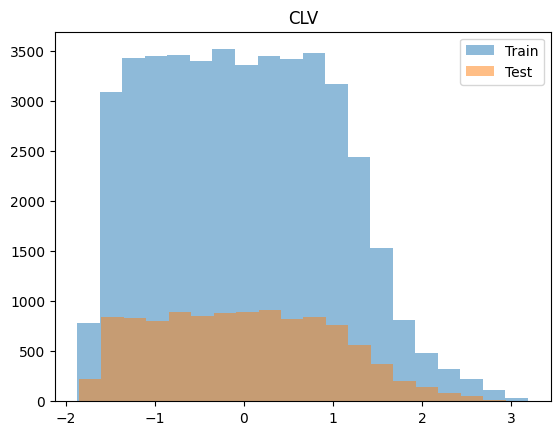

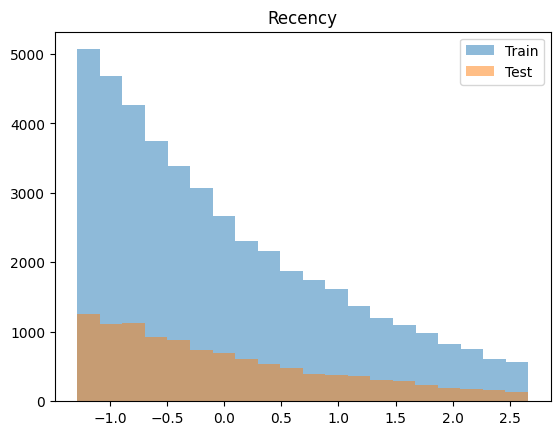

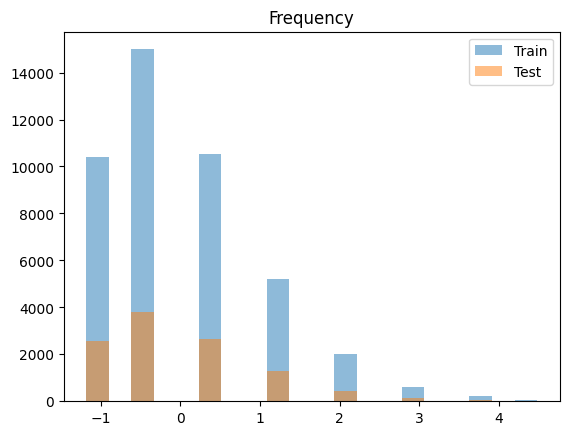

In [48]:
import matplotlib.pyplot as plt
for column in ['CLV', 'Recency', 'Frequency']:
    plt.hist(X_train[column], bins=20, alpha=0.5, label='Train')
    plt.hist(X_test[column], bins=20, alpha=0.5, label='Test')
    plt.title(column)
    plt.legend()
    plt.show()


In [49]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 1.00


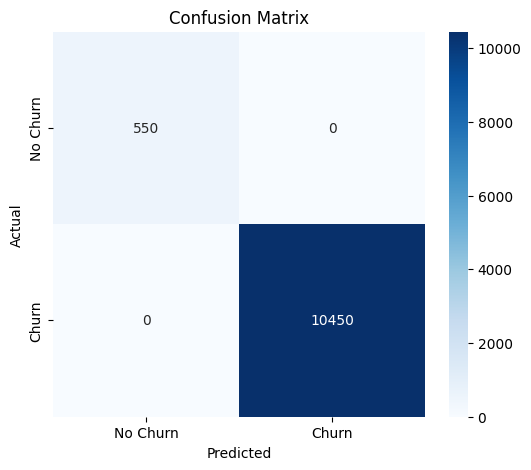

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
